In [75]:
# Author: Marion 
# Date: Okt 2021 (renewed in march 2022)
# Purpose: isolate the spots in the bloodvessels.


library(Rcpp)
library(Seurat)
library(ggplot2)
library(cowplot)
library(dplyr)
library(digest)
library(miniUI)
library(hdf5r)
library(dplyr)
library(grid)
library(gridExtra)

# load .rds object (WM)
seu <- readRDS(file = "RData/seurat/1.datasets.rds") 

########### set threshold per spot, positive for blood vessels 
#load one specific sample
#ST31
#datasets <- seu[[1]]
#datasets
#head(datasets@meta.data)

#ST32
#datasets <- seu[[2]]
#datasets
#head(datasets@meta.data)

#ST33, threshold = 1.55 
#setwd("/data/bcn/Datasets/ST_WM/RData/persample/Seurat_bloodvessel_intermediate")
#name <- "ST33"
#datasets <- readRDS("ST33_cl5_folded_removed.rds")
#datasets
#head(datasets@meta.data)

#ST34, threshold = 
#name <- "ST34"
#datasets <- seu[[4]]
#datasets
#head(datasets@meta.data)

#ST67, threshold =4 
#name <- "ST67"
#datasets <- seu[[7]]
#datasets
#head(datasets@meta.data)

#ST68, threshold = 3.5 
#name <- "ST68"
#datasets<- seu[[8]]
#datasets
#head(datasets@meta.data)

#ST69, threshold =2.6 
#datasets<- seu[[9]]
#datasets
#head(datasets@meta.data)

#ST70, threshold = 30 
#name<- "ST70"
#datasets<- seu[[10]]
#datasets
#head(datasets@meta.data)

#ST71, threshold =3.9 
#name <- "ST71"
#datasets<- seu[[11]]
#datasets
#head(datasets@meta.data)

#ST72, threshold = 3.2 
#name <- "ST72"
#datasets<- seu[[12]]
#datasets
#head(datasets@meta.data)

#ST73, threshold = 0.95 
#name <- "ST73"
#datasets<- seu[[13]]
#datasets
#head(datasets@meta.data)

#ST74, threshold = 1.35 
#name <- "ST74"
#datasets<- seu[[14]]
#datasets
#head(datasets@meta.data)

#ST75, threshold = 3.0 
name <- "ST75"
datasets<- seu[[15]]
datasets
head(datasets@meta.data)

#ST77, threshold = 0.57
#name <- "ST77"
#datasets<- seu[[16]]
#datasets
#head(datasets@meta.data)

#ST78, threshold = 0.8
#name <- "ST78"
#datasets<- seu[[17]]
#datasets
#head(datasets@meta.data)

#ST79, threshold = 22
#name <- "ST79"
#datasets<- seu[[18]]
#datasets
#head(datasets@meta.data)





An object of class Seurat 
33538 features across 4831 samples within 1 assay 
Active assay: Spatial (33538 features, 0 variable features)

,orig.ident,nCount_Spatial,nFeature_Spatial,sample_ID,slide,sample_name,donor_ID,lesiontype,Age,Sex,RIN,PMI_min,brain_pH,Group
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
AAACAACGAATAGTTC-1,ST75,617,455,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAAGTATCTCCCA-1,ST75,1427,852,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAATCTACTAGCA-1,ST75,1194,673,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACACCAATAACTGC-1,ST75,1067,717,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGAGCGACTCCT-1,ST75,1238,761,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGCTTTCAGAAG-1,ST75,1600,926,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive


In [76]:

# load bloodvessel marker .csv file
markers <- read.csv(file = '/data/bcn/Datasets/ST_WM/our_genesets/inflamed BV module.csv', header = T, stringsAsFactors = F)
markers

head(datasets)
meta.vars <- ncol(datasets@meta.data)

DefaultAssay(datasets) <- "Spatial"
#calculate the module scores
for (column in 1:ncol(markers)){
    datasets <- AddModuleScore(datasets, features = list(na.omit(markers[,column])), name = colnames(markers)[column], ctrl=50, nbin=12)
    }

head(datasets@meta.data)

head(datasets@meta.data)['Inflamed_Bloodvessels1'] # optional check


Inflamed_Bloodvessels
<chr>
CCL5
FBLN1
HLA-B
B2M
IGKC
DCN
CEMIP
RPL3
IGHG1


,orig.ident,nCount_Spatial,nFeature_Spatial,sample_ID,slide,sample_name,donor_ID,lesiontype,Age,Sex,RIN,PMI_min,brain_pH,Group
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
AAACAACGAATAGTTC-1,ST75,617,455,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAAGTATCTCCCA-1,ST75,1427,852,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAATCTACTAGCA-1,ST75,1194,673,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACACCAATAACTGC-1,ST75,1067,717,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGAGCGACTCCT-1,ST75,1238,761,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGCTTTCAGAAG-1,ST75,1600,926,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGGGTCTATATT-1,ST75,2460,1360,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACAGTGTTCCTGGG-1,ST75,3158,1611,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive
AAACATTTCCCGGATT-1,ST75,579,370,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive


,orig.ident,nCount_Spatial,nFeature_Spatial,sample_ID,slide,sample_name,donor_ID,lesiontype,Age,Sex,RIN,PMI_min,brain_pH,Group,Inflamed_Bloodvessels1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>
AAACAACGAATAGTTC-1,ST75,617,455,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.2578616
AAACAAGTATCTCCCA-1,ST75,1427,852,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.3826472
AAACAATCTACTAGCA-1,ST75,1194,673,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.9306747
AAACACCAATAACTGC-1,ST75,1067,717,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.3799314
AAACAGAGCGACTCCT-1,ST75,1238,761,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,1.1720983
AAACAGCTTTCAGAAG-1,ST75,1600,926,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.1172098


,Inflamed_Bloodvessels1
,<dbl>
AAACAACGAATAGTTC-1,0.2578616
AAACAAGTATCTCCCA-1,0.3826472
AAACAATCTACTAGCA-1,0.9306747
AAACACCAATAACTGC-1,0.3799314
AAACAGAGCGACTCCT-1,1.1720983
AAACAGCTTTCAGAAG-1,0.1172098


[1] 0.2578616 0.3826472 0.9306747 0.3799314 1.1720983 0.1172098

[1] "0.257861635220126 is the bloodvessel threshold"
[2] "0.257861635220126 is the bloodvessel threshold"
[3] "0.257861635220126 is the bloodvessel threshold"
[4] "0.257861635220126 is the bloodvessel threshold"
[5] "0.257861635220126 is the bloodvessel threshold"



FALSE  TRUE 
 4668   163 

,orig.ident,nCount_Spatial,nFeature_Spatial,sample_ID,slide,sample_name,donor_ID,lesiontype,Age,Sex,RIN,PMI_min,brain_pH,Group,Inflamed_Bloodvessels1,Inflamed_BV_threshold
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>
AAACAACGAATAGTTC-1,ST75,617,455,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.2578616,0
AAACAAGTATCTCCCA-1,ST75,1427,852,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.3826472,0
AAACAATCTACTAGCA-1,ST75,1194,673,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.9306747,0
AAACACCAATAACTGC-1,ST75,1067,717,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.3799314,0
AAACAGAGCGACTCCT-1,ST75,1238,761,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,1.1720983,0
AAACAGCTTTCAGAAG-1,ST75,1600,926,ST75,ST_12,Inactive_2006-017,2006-017,Inactive,44,F,8.5,615,6.34,Inactive,0.1172098,0


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


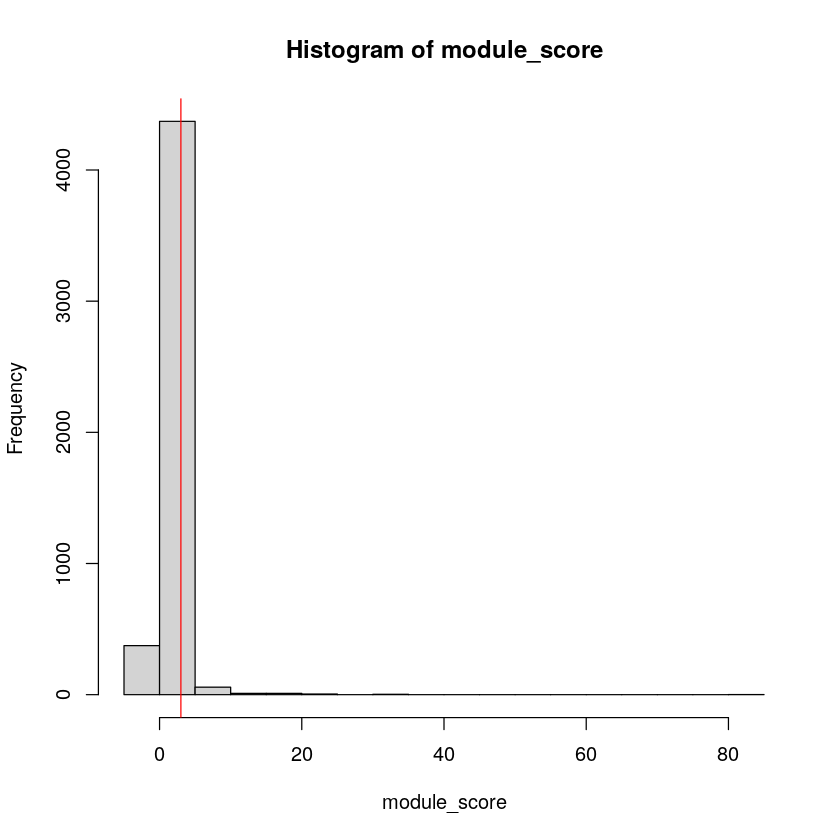

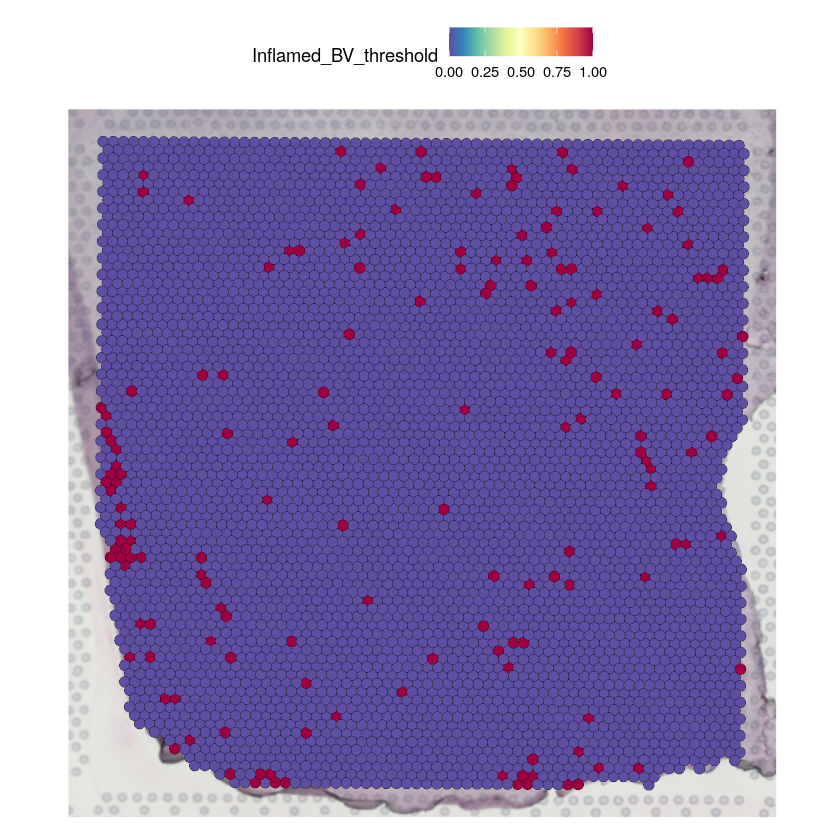

In [77]:
# set threshold for bloodvessels (per sample)
module_score <- datasets@meta.data[, ncol(datasets@meta.data)] #last calculated module score
head(module_score)
# Tips to investigate threshold for bloodvessels. I mainly just looked at the plot and the HE image.
quantile3 <- quantile(module_score[[1]])                       
print(paste(quantile3, "is the bloodvessel threshold"))
threshold = 3
t <- threshold
hist(module_score)
abline(v=threshold, col= "red")


table(module_score > threshold)

datasets$Inflamed_BV_threshold <- ifelse(test = module_score > threshold, yes=1, no=0)
head(datasets@meta.data)

plot2 <- SpatialPlot(datasets, features = "Inflamed_BV_threshold")
#setwd("/data/bcn/Datasets/ST_WM/Routput/Seurat/bloodvessel_analysis/images_bloodvessels_threshold/") 
#pdf(paste0(name,"_bloodvessel_2.pdf"))
print(plot2)
#dev.off()




Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

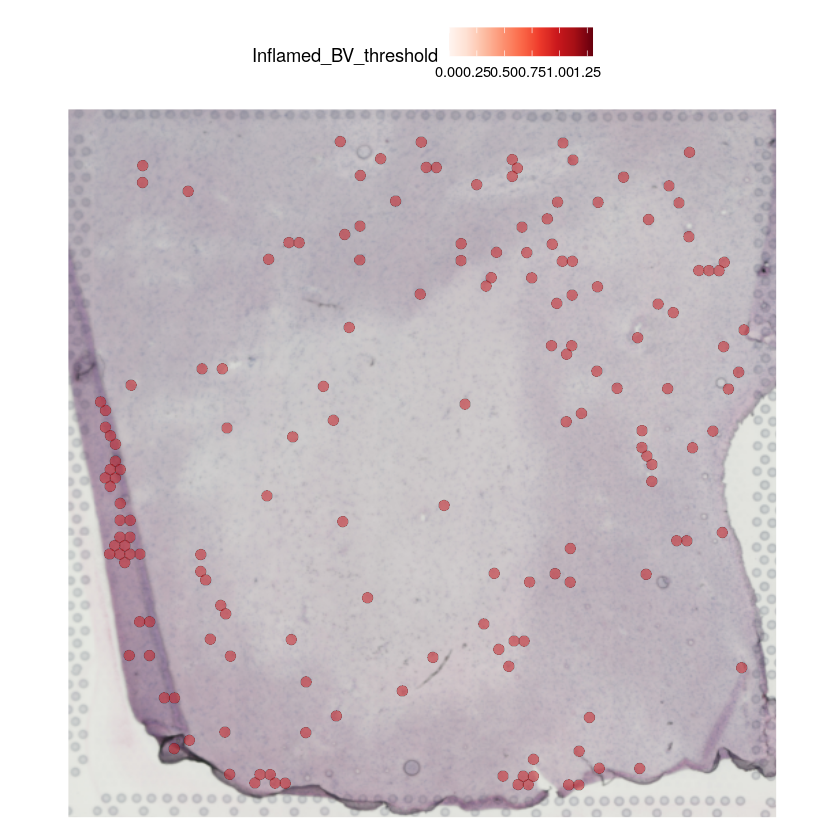

In [79]:
#investigate location of BVs in HE image

library(RColorBrewer)
my_cols=brewer.pal(n=9, "Reds")

subset1 <- datasets
subset1 <- subset(subset1, subset = Inflamed_BV_threshold == 1)
plot1 <- SpatialPlot(subset1, features = "Inflamed_BV_threshold", cols="red", alpha = 0.5) +
scale_fill_gradientn(colors = my_cols, limits = c(0, 1.3)) 
plot1

In [122]:
# calculate percentage of positive bloodvessel spots
table(module_score > threshold)
print(paste(sum(module_score>threshold), "is the number of spots positive for blood vessels"))

total_spots <- sum(datasets$Inflamed_BV_threshold ==0) + sum(datasets$Inflamed_BV_threshold ==1)
total_spots

percentage_of_total <- (sum(module_score>threshold) / total_spots) *100
print(paste(percentage_of_total, "is the percentage of bloodvessels spots of total for", datasets$orig.ident[1]))





FALSE  TRUE 
 4745    86 

[1] "86 is the number of spots positive for blood vessels"


[1] 4831

[1] "1.78016973711447 is the percentage of bloodvessels spots of total for ST75"


In [80]:
# subset the info
bloodvessels<- datasets@meta.data[, c(1,15:ncol(datasets@meta.data))]
head(bloodvessels)
write.csv(bloodvessels, paste0(name, "_bloodvessels_thresholding.csv"))

## save rds 
saveRDS(datasets, paste0(name, "_bloodvessel_threshold=", t, ".rds"))



,orig.ident,Inflamed_Bloodvessels1,Inflamed_BV_threshold
,<chr>,<dbl>,<dbl>
AAACAACGAATAGTTC-1,ST75,0.2578616,0
AAACAAGTATCTCCCA-1,ST75,0.3826472,0
AAACAATCTACTAGCA-1,ST75,0.9306747,0
AAACACCAATAACTGC-1,ST75,0.3799314,0
AAACAGAGCGACTCCT-1,ST75,1.1720983,0
AAACAGCTTTCAGAAG-1,ST75,0.1172098,0
